# 代码

In [14]:
from name_exist import *

# 超参数

In [15]:
args = {
    'domain': 'www.ntu.edu.tw',
    'option_lsh': 'ssdeep',  # 使用LSH算法评估网页相似度: ssdeep
    'threads': 30,
    'dns_type': 1,
    'fuzzer_num': 500 , # 0-np.inf，inf代表输出所有的生成结果
    'threshold_value': 0.15,
    'tld_all': True,
    'fuzzers': [
#         'bitsquatting', 'vowel-swap', 'cyrillic', 'homoglyph', 'repetition','various'
        'addition',
        'hyphenation',
        'insertion', 'omission', 'replacement',
        'subdomain', 'transposition'
    ],
    'useragent': USER_AGENT_STRING,
    'request_timeout_http': 1.5
}

# 主程序

In [16]:
import time

t1=time.time()
url = UrlParser(args['domain'])
fuzz = fuzzer_plus.Fuzzer(domain=url.domain, tld_all=args['tld_all'], threshold_value=args['threshold_value'],
                          top=args['fuzzer_num'])
fuzz.generate(args['fuzzers'])
domains = list(fuzz.domains_tld)
len_fuzz=len(domains)

In [17]:
pd.DataFrame(domains)

,fuzzer,domain,score
0,addition,www.nttu.edu.tw,1.500000
1,addition,www.ntut.edu.tw,1.500000
2,addition,www.tntu.edu.tw,1.500000
3,addition,www.untu.edu.tw,1.500000
4,addition,www.nntu.edu.tw,1.500000
...,...,...,...
284,tld-swap,www.nt3.com.tw,2.753434
285,tld-swap,www.nt6.com.tw,2.753434
286,tld-swap,www.nt4.com.tw,2.753434
287,tld-swap,www.nwu.edu.ph,2.753434


In [18]:
_ = min(args['fuzzer_num'], len(domains))
domains = domains[:_].copy()
t2=time.time()
print("Fuzzer耗时：{:.2f}s".format(t2-t1))

Fuzzer耗时：1.33s


In [20]:
# t3=time.time()
# domains = search_status_code(domains, args['request_timeout_http'], args['threads'])
save_domains(domains, "{}生成的混淆域名".format(url.domain))
# t4=time.time()
# print("request发包过滤耗时：{:.2f}s".format(t4-t3))

文件：D:\Desktop\上班\dnstwist-20230509\Similar_domain_name_detection\example\file\www.ntu.edu.tw生成的混淆域名.csv保存成功


In [21]:
print(domains)

[{'fuzzer': 'addition', 'domain': 'www.nttu.edu.tw', 'score': 1.5}, {'fuzzer': 'addition', 'domain': 'www.ntut.edu.tw', 'score': 1.5}, {'fuzzer': 'addition', 'domain': 'www.tntu.edu.tw', 'score': 1.5}, {'fuzzer': 'addition', 'domain': 'www.untu.edu.tw', 'score': 1.5}, {'fuzzer': 'addition', 'domain': 'www.nntu.edu.tw', 'score': 1.5}, {'fuzzer': 'addition', 'domain': 'www.nutu.edu.tw', 'score': 1.5}, {'fuzzer': 'addition', 'domain': 'www.ntnu.edu.tw', 'score': 1.5}, {'fuzzer': 'addition', 'domain': 'www.ntun.edu.tw', 'score': 1.5}, {'fuzzer': 'addition', 'domain': 'www.ntuu.edu.tw', 'score': 1.5}, {'fuzzer': 'addition', 'domain': 'www.tun.edu.tw', 'score': 1.584962500721156}, {'fuzzer': 'addition', 'domain': 'www.6tu.edu.tw', 'score': 1.584962500721156}, {'fuzzer': 'addition', 'domain': 'www.nku.edu.tw', 'score': 1.584962500721156}, {'fuzzer': 'addition', 'domain': 'www.ntz.edu.tw', 'score': 1.584962500721156}, {'fuzzer': 'addition', 'domain': 'www.xtu.edu.tw', 'score': 1.58496250072115

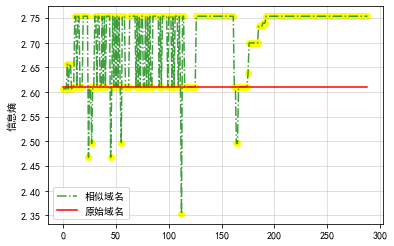

In [7]:
fuzz._make_fig(url.domain)

In [8]:
# domains = search_dns(domains, _type=args['dns_type'], tnum=args['threads'])
# save_domains(domains, "DNS过滤后的混淆域名")

In [9]:
t5=time.time()
domains = LSH_alg(args['domain'], domains, args['request_timeout_http'], args['useragent'], args['option_lsh'])
save_domains(domains, "{}LSH过滤后的混淆域名".format(url.domain))
t6=time.time()
len_lsh=len(domains)


将要进行LSH检测的域名：

       fuzzer           domain     score
0    addition  www.nttu.edu.tw  1.500000
1    addition  www.ntut.edu.tw  1.500000
2    addition  www.tntu.edu.tw  1.500000
3    addition  www.untu.edu.tw  1.500000
4    addition  www.nntu.edu.tw  1.500000
..        ...              ...       ...
284  tld-swap   www.nt3.com.tw  2.753434
285  tld-swap   www.nt6.com.tw  2.753434
286  tld-swap   www.nt4.com.tw  2.753434
287  tld-swap   www.nwu.edu.ph  2.753434
288  tld-swap   www.wtu.edu.ph  2.753434

[289 rows x 3 columns]
>www.nttu.edu.tw的LSH得分：0 https://www.nttu.edu.tw/
>www.ntw.nhs.uk的LSH得分：0 https://www.ntw.nhs.uk/
>www.ntut.edu.tw查询出错：The read operation timed out
>www.tun.com.tw查询出错：<urlopen error [Errno 11002] getaddrinfo failed>
>www.ntnu.edu.tw的LSH得分：0 https://www.ntnu.edu.tw/
>www.stu.edu.tw的LSH得分：0 https://www.stu.edu.tw/
>www.nti.com.tw的LSH得分：0 http://www.nti.com.tw/index.html
>www.tnu.edu.tw查询出错：<urlopen error _ssl.c:1059: The handshake operation timed out>
>www.niu.edu.

In [10]:
pd.DataFrame(domains)

,fuzzer,domain,score,LSH_score
0,addition,www.nttu.edu.tw,1.500000,0
1,tld-swap,www.ntw.nhs.uk,2.753434,0
2,addition,www.ntut.edu.tw,1.500000,The read operation timed out
3,tld-swap,www.tun.com.tw,2.753434,<urlopen error [Errno 11002] getaddrinfo failed>
4,addition,www.ntnu.edu.tw,1.500000,0
5,addition,www.stu.edu.tw,1.584963,0
6,tld-swap,www.nti.com.tw,2.753434,0
7,transposition,www.tnu.edu.tw,1.584963,<urlopen error _ssl.c:1059: The handshake oper...
8,addition,www.niu.edu.tw,1.584963,The read operation timed out
9,tld-swap,www.ntw.com.tw,2.495603,<urlopen error timed out>


In [11]:
print("LSH过滤过滤耗时：{:.2f}s".format(t6-t5))

LSH过滤过滤耗时：421.57s


In [12]:
sum_time=t6-t1
print("共计耗时：{:.2f}s".format(t6-t1))

共计耗时：428.25s


In [13]:
banner='''
1. 对域名{}进行探索，fuzzer生成{}条域名
2. 取前{}条进行ssdeep过滤，得到{}条互联网中存活的域名，均未发现有相似的网页
3. 共计耗时：{}s ，超参数设置如下：\n\n{}
'''.format(url.domain,len_fuzz,args['fuzzer_num'],len_lsh,sum_time,args)
print(banner)


1. 对域名www.ntu.edu.tw进行探索，fuzzer生成289条域名
2. 取前500条进行ssdeep过滤，得到58条互联网中存活的域名，均未发现有相似的网页
3. 共计耗时：428.24584579467773s ，超参数设置如下：

{'domain': 'www.ntu.edu.tw', 'option_lsh': 'ssdeep', 'threads': 30, 'dns_type': 1, 'fuzzer_num': 500, 'threshold_value': 0.15, 'tld_all': True, 'fuzzers': ['addition', 'hyphenation', 'insertion', 'omission', 'replacement', 'subdomain', 'transposition'], 'useragent': 'Mozilla/5.0 (win32 64-bit) dnstwist/20230526', 'request_timeout_http': 1.5}

